In [1]:
import pandas as pd   #importing pandas

dataset = pd.read_csv("Product_Sale.csv")   #reading CSV file
dataset.head()   #displaying first 5 rows

,age,sal,result
0,12,52000,1
1,13,55500,0
2,16,54300,1
3,54,545400,1
4,45,454500,0


In [2]:
print(dataset.shape)   # Displaying rows and columns
print(dataset.info())   # Information in dataframe
dataset.describe()   # Statistics of dataset

(101, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     101 non-null    int64
 1   sal     101 non-null    int64
 2   result  101 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None


,age,sal,result
count,101.000000,101.000000,101.000000
mean,43.376238,427069.376238,0.702970
std,19.235307,251940.672208,0.459229
min,12.000000,10900.000000,0.000000
25%,26.000000,233200.000000,0.000000
50%,45.000000,494900.000000,1.000000
75%,58.000000,600000.000000,1.000000
max,88.000000,966900.000000,1.000000


# Percentage of people bought and not bought the product

In [3]:
bought = 0
not_bought = 0
status = dataset["result"]
for i in range(len(status)):
    if status[i]==1:
        bought+=1
    else:
        not_bought+=1

print("Total num of people bought the product is: ", bought)
bought_per = (bought/len(status))*100
print("percentage of people bought the product in the data set is: ", bought_per)

print("Total num of people not bought the product is: ", not_bought)
not_bought_per = (not_bought/len(status))*100
print("percentage of non bought the product in the data set is: ", not_bought_per, "\n")

Total num of people bought the product is:  71
percentage of people bought the product in the data set is:  70.29702970297029
Total num of people not bought the product is:  30
percentage of non bought the product in the data set is:  29.7029702970297 



# Plotting the graph between people who bought the product and not bought the product

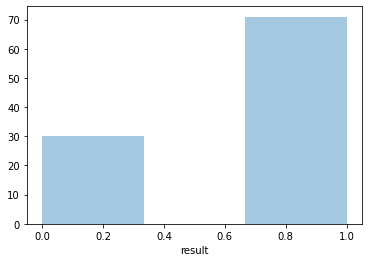

In [4]:
import matplotlib.pyplot as plt   # Importing matplotlib
import seaborn as sns

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

sns.distplot(dataset["result"], kde = False)

plt.show()   # Graph for num of movies in first 5 languages

# For modeling we need to split dataset
    0.8 = 80% of data will use to train the model
    0.2 = 20% of data will validate the model

In [5]:
from sklearn.model_selection import train_test_split

# Segregating labels into separate variable
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 6)

In [6]:
from sklearn.preprocessing import StandardScaler   #importing StandardScaler

sc = StandardScaler()   # Assigning StandardScaler to sc
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression   # import LogisticRegression

log_reg = LogisticRegression()   # Assigning LogisticRegression() to log_reg
log_reg.fit(x_train, y_train)   #fitting log_reg to the train the model

LogisticRegression()

In [8]:
from sklearn.metrics import confusion_matrix # import confusion_matrix

y_predict = log_reg.predict(x_test)   #predict instances from the test set

# finding score for logreg model
print("Accuracy of logistic regression classifert: ", log_reg.score(x_test, y_test))

confusion_matrix(y_test, y_predict)

Accuracy of logistic regression classifert:  0.8095238095238095


array([[ 0,  4],
       [ 0, 17]], dtype=int64)

In [9]:
age = int(input("Enter new customer age: "))   #asking the user to enter the age
sal = int(input("Enter new customer salary: "))   #asking the user to enter the sal
new_cust = [[age, sal]]   #storing the data given by user in new_cust
result = log_reg.predict(sc.transform(new_cust))   #predicting whether customer will buy the product or not
print(result)
if result == 1:
    print("Customer will buy")
else:
    print("Customer won't buy")

Enter new customer age: 36
Enter new customer salary: 633600
[1]
Customer will buy
